<a href="https://colab.research.google.com/github/Rickmwasofficial/Learning-Machine-Learning/blob/main/Handwriting_Recognition_MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building a model using the MNIST dataset

---

Train - 60,000

Test = 10,000

This neural network classifies images of different characters

In [2]:
# Import nescessary tools and the data
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
len(train_data), len(train_labels)

(60000, 60000)

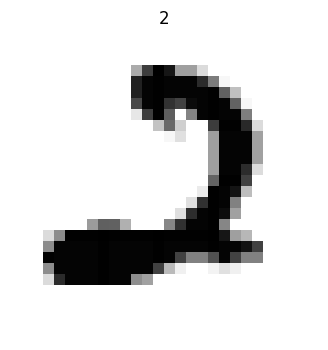

In [7]:
# Visualize the data
import matplotlib.pyplot as plt
num = 1010
plt.figure(figsize=(4, 4))
plt.imshow(train_data[num], cmap=plt.cm.binary)
plt.title(train_labels[num])
plt.axis(False)
plt.show()

In [28]:
import numpy as np
len(np.unique(train_labels))

10

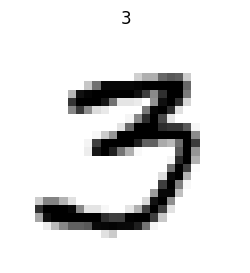

In [17]:
# Plot random images
import random
plt.figure(figsize=(3, 3))
num = random.choice(range(len(train_data)))
plt.imshow(train_data[num], cmap=plt.cm.binary)
plt.title(train_labels[num])
plt.axis(False)
plt.show()

## Build the model

In [18]:
# First we normalize our data
train_data.min(), train_data.max()

(0, 255)

In [26]:
train_norm = train_data / 255.0
test_norm = test_data / 255.0

In [29]:
# Building the model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_1 = model_1.fit(train_norm,
                                              train_labels,
                                              epochs=20,
                                              validation_data=(test_norm, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4295 - loss: 1.5711 - val_accuracy: 0.7328 - val_loss: 0.8363
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7333 - loss: 0.8287 - val_accuracy: 0.7799 - val_loss: 0.7152
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7728 - loss: 0.7331 - val_accuracy: 0.8072 - val_loss: 0.6549
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8004 - loss: 0.6708 - val_accuracy: 0.8186 - val_loss: 0.6166
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8147 - loss: 0.6266 - val_accuracy: 0.8306 - val_loss: 0.5834
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8244 - loss: 0.5934 - val_accuracy: 0.8355 - val_loss: 0.5644
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8300 - loss: 0.5725 - val_accuracy: 0.8393 - val_loss: 0.5520
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8346 - loss: 0.5573 - 

<Axes: >

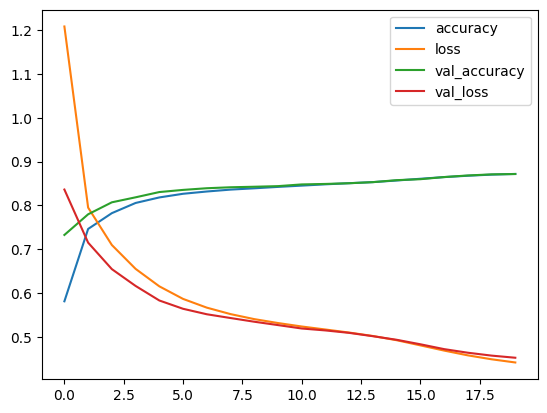

In [30]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [56]:
# Function to plot confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_conf_mat(y_true, y_preds, classes=None):
  figsize = (25, 13)

  conf_mat = confusion_matrix(y_true, y_preds)
  conf_norm = conf_mat.astype("float")/ conf_mat.sum(axis=1)[:, np.newaxis] # This will normalize our confusion matrix
  n_classes = conf_mat.shape[0]

  # lets prettify it
  fig , ax = plt.subplots(
      figsize=figsize,

  )
  # create a matrix plot
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(n_classes)

  ax.set(title='Confusion matrix',
        xlabel= 'Predictions',
        ylabel= 'True labels',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        yticklabels= labels,
        xticklabels= labels)

  # Set a threshold for different color
  threshold = ((conf_mat.max() + conf_mat.min()) / 2.)

  # Set axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # plot text in each cell
  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    plt.text(j, i, f"{conf_mat[i, j]} ({conf_norm[i, j]*100:.1f}%)",
        horizontalalignment='center',
        color = 'white' if conf_mat[i, j] > threshold else "black",
        size = 10
  )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


0

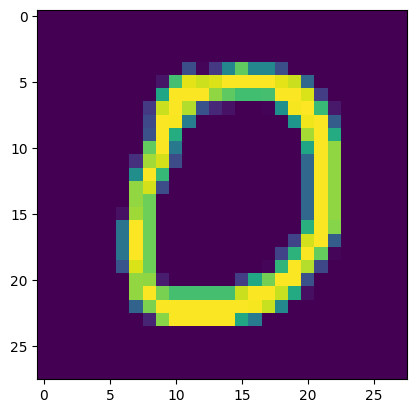

In [42]:
numb = 10
plt.imshow(test_data[numb])
model_1.predict(test_data[numb].reshape(1, 28, 28)).argmax()

In [52]:
y_preds = model_1.predict(test_data).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


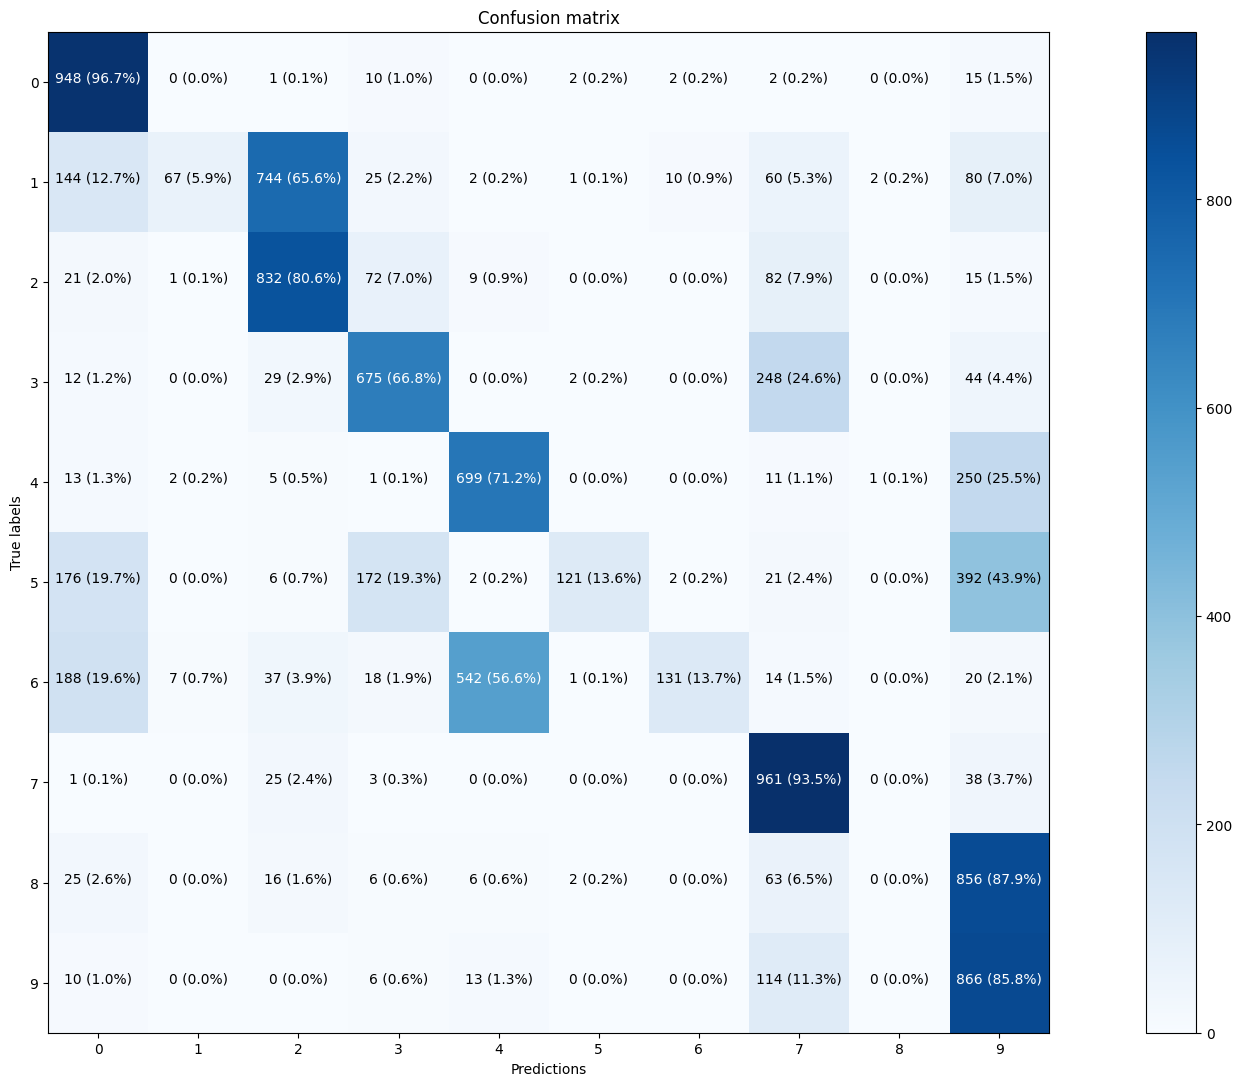

In [57]:
plot_conf_mat(test_labels, y_preds, list(np.unique(test_labels)))

In [63]:
# Since the model is confusing some digits more, maybe we can try improving it by training for longer
# Building the model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_2 = model_2.fit(train_norm,
                                              train_labels,
                                              epochs=70,
                                              validation_data=(test_norm, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3510 - loss: 1.7169 - val_accuracy: 0.6384 - val_loss: 1.0770
Epoch 2/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6471 - loss: 1.0181 - val_accuracy: 0.7023 - val_loss: 0.8528
Epoch 3/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7260 - loss: 0.8399 - val_accuracy: 0.7662 - val_loss: 0.7724
Epoch 4/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7767 - loss: 0.7626 - val_accuracy: 0.7900 - val_loss: 0.7268
Epoch 5/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7972 - loss: 0.7193 - val_accuracy: 0.8024 - val_loss: 0.7033
Epoch 6/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8059 - loss: 0.6935 - val_accuracy: 0.8080 - val_loss: 0.6906
Epoch 7/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8110 - loss: 0.6767 - val_accuracy: 0.8092 - val_loss: 0.6842
Epoch 8/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8147 - loss: 0.6652 - 

<Axes: >

<Figure size 1000x700 with 0 Axes>

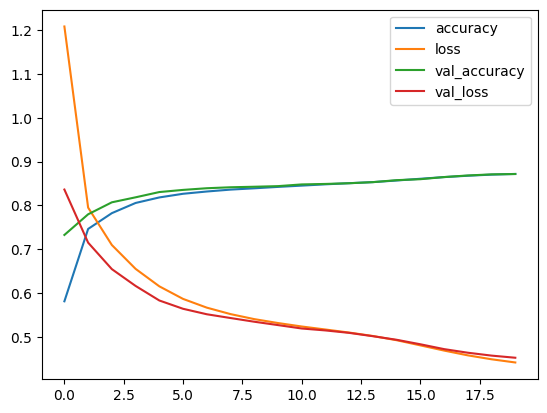

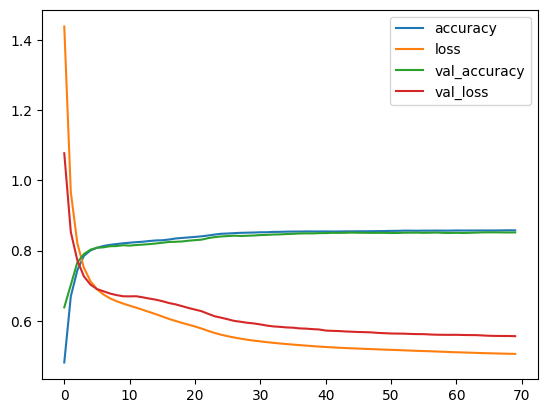

In [64]:
plt.figure(figsize=(10, 7))
pd.DataFrame(history_1.history).plot()
pd.DataFrame(history_2.history).plot()

In [65]:
y_preds_2 = model_1.predict(test_data).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


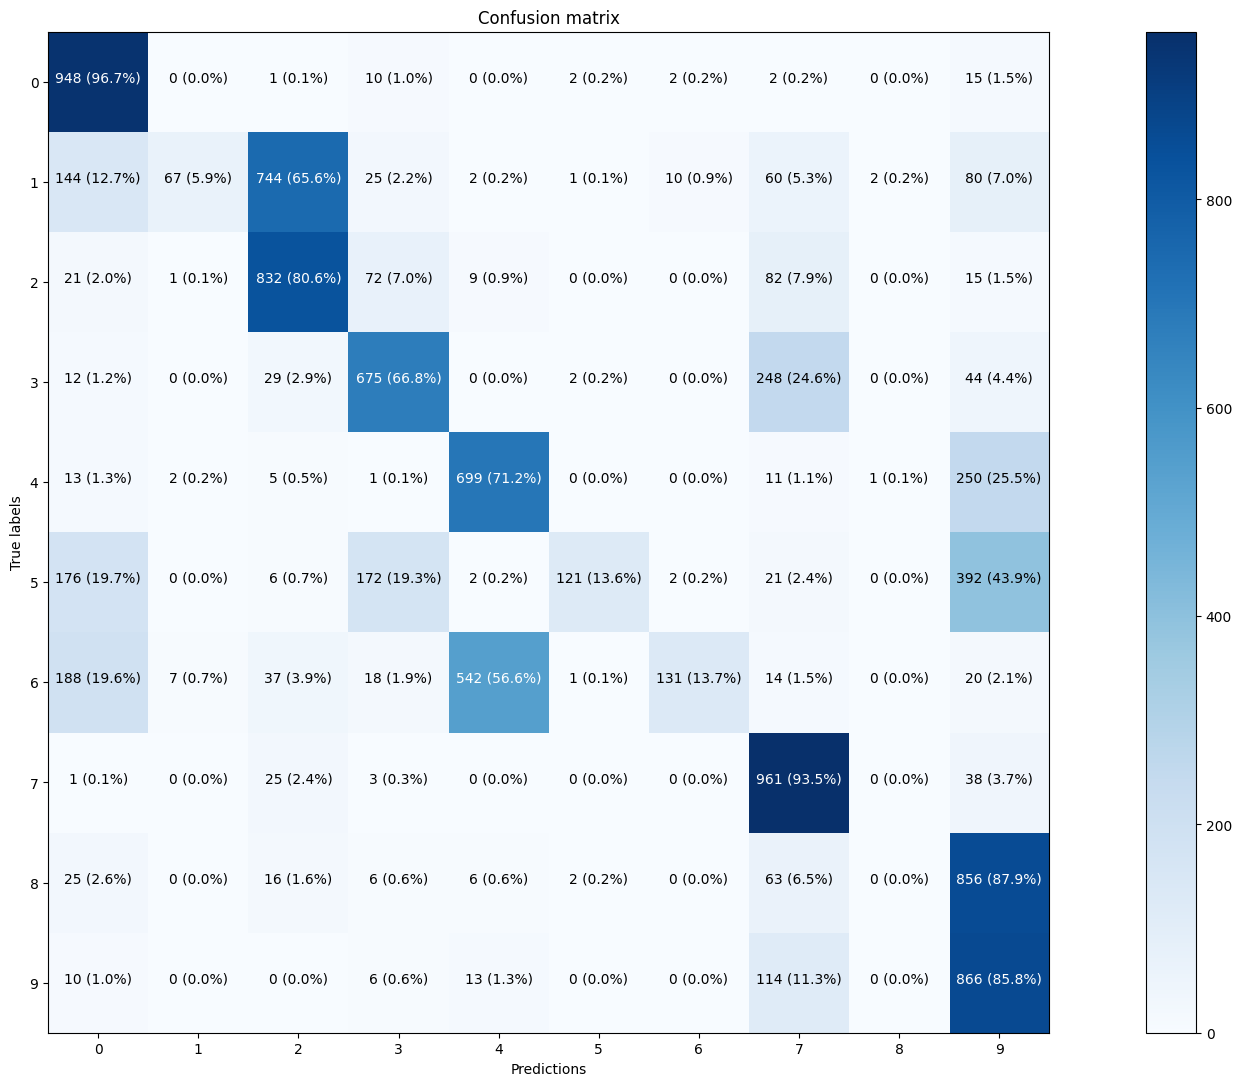

In [66]:
plot_conf_mat(test_labels, y_preds_2, list(np.unique(test_labels)))